In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import weather_api_key
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

32.919261378806056 -167.8700301938307
-3.5921694910760493 -58.9400034110169
-17.318471546262828 -14.962725403963105
83.86807993702215 145.4888298726553
45.4626501938979 -117.77152348044842
-86.51460926141093 -75.94604169503089
0.5116659096757559 -156.42776093366737
5.6592993190020735 -44.72894219546362
88.75424759738635 -2.691411626583715
-13.297831743485972 90.48913385009178
-50.15369269620157 71.66457716709317
-84.6529533880322 4.915174262461051
-25.10775932192969 -5.1239282861042454
-45.11837627782381 -42.00713293112861
-82.47787667608465 -169.3016605643099
-16.06929170610057 -6.291901246959185
-23.360131978743468 10.056117072909814
-86.90977144515625 8.2503703440332
48.01348619229702 37.25148846581811
87.17418697694148 26.161185866129358
-78.57026975617775 148.77032461581246
6.511938783696536 30.30343715671475
15.461311242632178 -51.21336255672213
42.7158653559523 -74.80454493012695
-29.074894363344946 -122.07867323604863
-18.38181210498196 118.83729991830052
-9.662034938583673 -81

-57.15308261840841 145.45709898058402
33.17901026732365 -164.68033484044852
-31.412217740946183 -18.81167193178547
-33.31354563340541 147.2078139329097
34.626910610320806 -3.1481359202447265
-28.089061521332695 19.75397066155125
56.651573750521635 -9.55473042266351
-78.20743590784362 -68.02139721708473
17.281739413422116 -130.29789424797173
-34.42544748328315 -42.63391523447061
-46.24021293794083 56.543787079457246
-39.554912881524764 -30.118311272867658
70.03344922078844 -113.33466117044622
19.674173465959242 -120.30387911874648
6.535024874207906 173.76617627553412
87.75896263217166 -152.5009381892186
-6.732108150417943 -159.37129036099617
8.83274434555652 143.01345245009952
34.642422199781265 98.64511387875024
-85.11152430726139 26.978891253466543
74.99471875211646 175.5631374538562
-14.858254057651294 -59.546810116165716
-43.91200777225053 44.55300586172433
-11.261691502362396 61.54470452382543
-58.60683414922222 -103.12751826446357
81.5072312835155 50.43728269872568
-2.667714555019

48.887734798509996 -24.207985595391733
25.816713634004117 -65.85119067884534
-57.607033637110995 -131.70531872277817
-18.35667816961947 68.74222559849471
-86.53786025551955 -107.2709647255291
16.98860526814373 -102.1497602182944
86.26444173595513 -52.90574688309651
38.5120948803914 135.6384011856162
39.27953485401747 156.50535751554617
-61.67555411625145 -69.12908790700571
57.9586468551193 -101.36188884187344
-42.719908599073484 20.122194579389003
64.03046711550402 -169.13666971852544
55.58719020718647 -126.04594134045087
-13.955306082960135 -95.05970169534983
-70.72565505985636 56.249311672284705
-79.21221013720766 74.94022295104372
-35.129625813781075 55.41985127775979
66.1416862237921 178.75727888799196
-49.02947974704489 28.269387727553834
-26.662586813361408 74.50688551346911
72.40976215656201 -97.74645721206967
-83.36011261233334 10.829659109743147
51.13020366709395 -44.35663239429746
54.723618425653285 -87.85648904082741
-24.415211139240583 103.90787176532842
-56.45418764186968 

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [32]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key



In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
import requests

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | nova olinda do norte
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | chokurdakh
Processing Record 5 of Set 1 | la grande
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | faanui
Processing Record 8 of Set 1 | salinopolis
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | bengkulu
Processing Record 11 of Set 1 | souillac
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | chuy
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | henties bay
Processing Record 16 of Set 1 | gornyak
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | yirol
City not found. Skipping...
Processing Record 20 of Set 1 | bathsheba
Processing Record 21 of Set 1 | oneonta
Processing Record 22 o

Processing Record 36 of Set 4 | lukovetskiy
Processing Record 37 of Set 4 | coihaique
Processing Record 38 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 39 of Set 4 | nuuk
Processing Record 40 of Set 4 | verkhnevilyuysk
Processing Record 41 of Set 4 | seoul
Processing Record 42 of Set 4 | hithadhoo
Processing Record 43 of Set 4 | leh
Processing Record 44 of Set 4 | katsuura
Processing Record 45 of Set 4 | martapura
Processing Record 46 of Set 4 | saint-louis
Processing Record 47 of Set 4 | tabou
Processing Record 48 of Set 4 | karratha
Processing Record 49 of Set 4 | pevek
Processing Record 50 of Set 4 | palauig
Processing Record 1 of Set 5 | prince rupert
Processing Record 2 of Set 5 | makakilo city
Processing Record 3 of Set 5 | oktyabrskoye
Processing Record 4 of Set 5 | marcona
City not found. Skipping...
Processing Record 5 of Set 5 | ruatoria
City not found. Skipping...
Processing Record 6 of Set 5 | kilmez
City not found. Skipping...
Processing Record 7 of Set

Processing Record 25 of Set 8 | cocobeach
Processing Record 26 of Set 8 | taltal
Processing Record 27 of Set 8 | maldonado
Processing Record 28 of Set 8 | santa rosa
Processing Record 29 of Set 8 | tomigusuku
Processing Record 30 of Set 8 | arandas
Processing Record 31 of Set 8 | naze
Processing Record 32 of Set 8 | ulladulla
Processing Record 33 of Set 8 | muzquiz
City not found. Skipping...
Processing Record 34 of Set 8 | egvekinot
Processing Record 35 of Set 8 | reyes
Processing Record 36 of Set 8 | alanya
Processing Record 37 of Set 8 | diamantino
Processing Record 38 of Set 8 | mago
Processing Record 39 of Set 8 | kuznechikha
Processing Record 40 of Set 8 | viransehir
Processing Record 41 of Set 8 | solnechnyy
Processing Record 42 of Set 8 | port augusta
Processing Record 43 of Set 8 | streator
Processing Record 44 of Set 8 | moga
Processing Record 45 of Set 8 | iralaya
Processing Record 46 of Set 8 | shelburne
Processing Record 47 of Set 8 | alibag
Processing Record 48 of Set 8 |

Processing Record 8 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 9 of Set 12 | verkhoyansk
Processing Record 10 of Set 12 | mwense
Processing Record 11 of Set 12 | touros
Processing Record 12 of Set 12 | limon
Processing Record 13 of Set 12 | buzmeyin
Processing Record 14 of Set 12 | nome
Processing Record 15 of Set 12 | salinas
Processing Record 16 of Set 12 | antequera
Processing Record 17 of Set 12 | yancheng
Processing Record 18 of Set 12 | meulaboh
Processing Record 19 of Set 12 | mocambique
City not found. Skipping...
Processing Record 20 of Set 12 | fier
Processing Record 21 of Set 12 | posse
Processing Record 22 of Set 12 | la ronge
Processing Record 23 of Set 12 | meadow lake
Processing Record 24 of Set 12 | taormina
Processing Record 25 of Set 12 | coihueco
Processing Record 26 of Set 12 | susehri
Processing Record 27 of Set 12 | marystown
Processing Record 28 of Set 12 | ayr
Processing Record 29 of Set 12 | quesnel
Processing Record 30 of Set 12 | belyy 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.columns


Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [10]:
## reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [11]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-06-15 17:52:32,22.0752,-159.3190,78.48,87,40,10.36
1,Nova Olinda Do Norte,BR,2022-06-15 17:52:32,-3.8881,-59.0942,82.35,78,66,3.65
2,Jamestown,US,2022-06-15 17:52:33,42.0970,-79.2353,87.03,73,90,8.01
3,Chokurdakh,RU,2022-06-15 17:52:33,70.6333,147.9167,58.89,37,72,9.55
4,La Grande,US,2022-06-15 17:47:46,45.3246,-118.0877,64.24,52,58,9.37


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## STEM Project

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Get today's date in seconds.
today = time.time()
today

1655316793.8045492

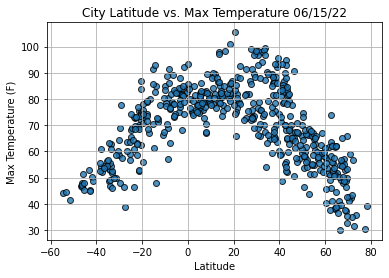

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

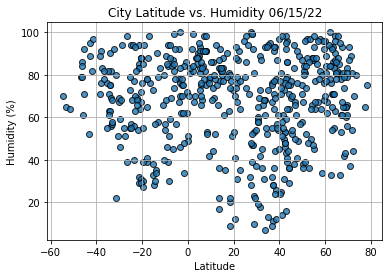

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

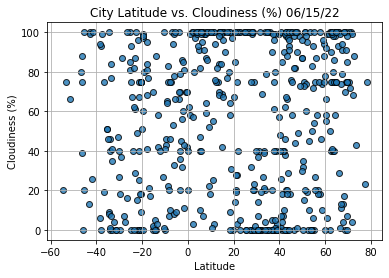

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

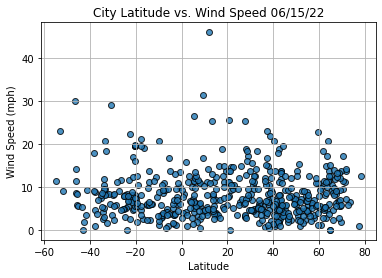

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
#def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

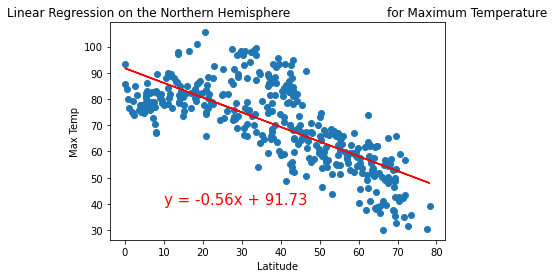

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

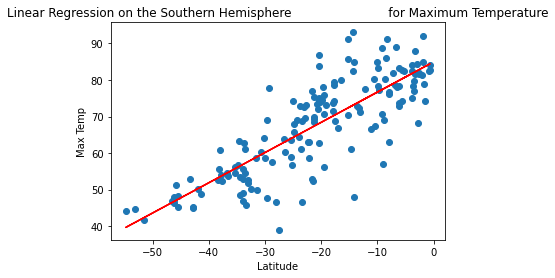

In [24]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

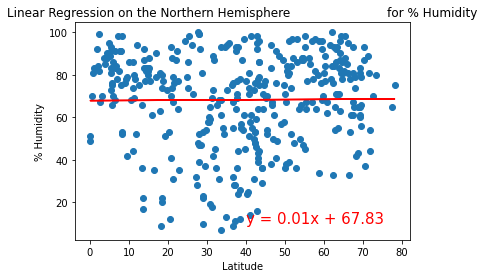

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

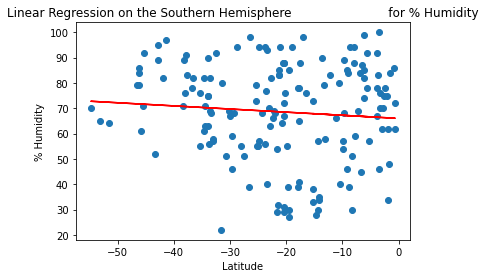

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

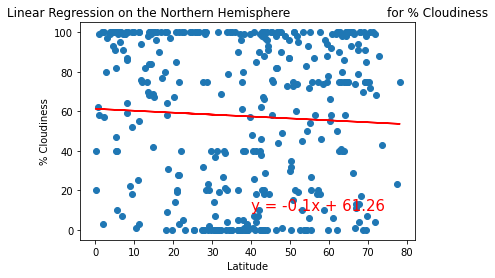

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

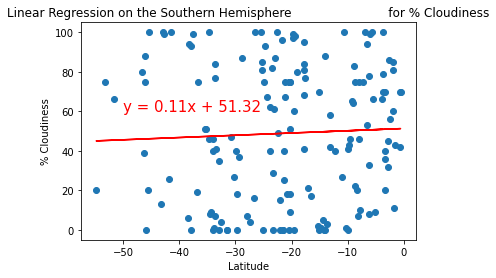

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

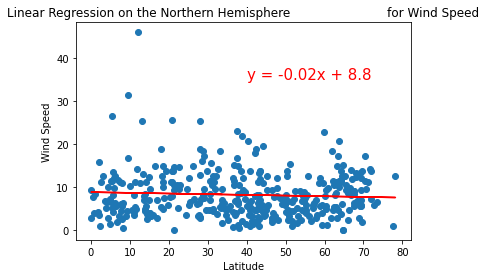

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


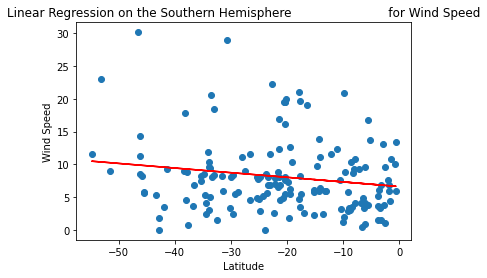

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))